<a href="https://colab.research.google.com/github/helonayala/sysid/blob/main/case_studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook loads and plots data for the "Coupled Drives" case study.

In [41]:
import os
import scipy.io
import numpy as np # Good practice to import, especially if .ravel() is needed
import matplotlib.pyplot as plt


File 'closedLoop.mat' downloaded successfully.
Loading data from 'closedLoop.mat'...
File loaded. Extracting variables...
Data extracted successfully.


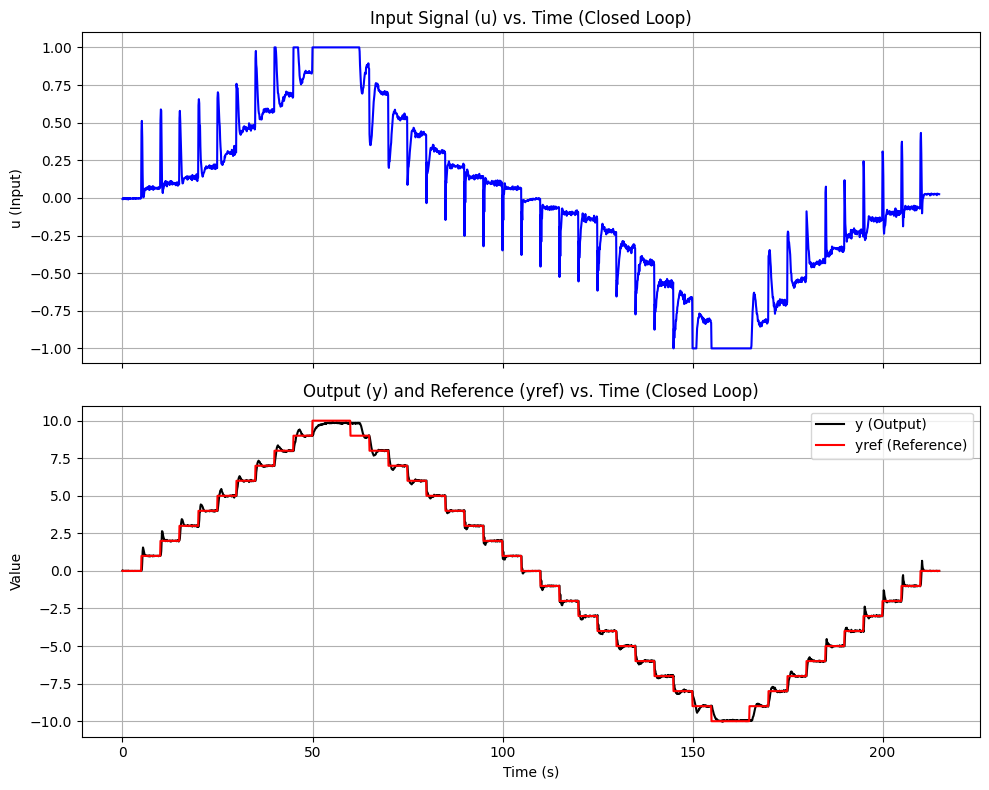

In [42]:

# --- Configuration ---
# URL of the .mat file
file_url = 'https://github.com/helonayala/sysid/raw/refs/heads/main/data/closedLoop.mat'
# Desired local filename
local_filename = 'closedLoop.mat'

# --- 1. Download the .mat file ---
print(f"Downloading {file_url} as {local_filename}...")
# Use -O to specify the output file, overwriting if it exists. -q for quiet.
# Adding !rm -f to ensure a clean download if the cell is re-run.
get_ipython().system(f"rm -f {local_filename}") # Remove if exists to ensure fresh download
get_ipython().system(f"wget -q -O {local_filename} '{file_url}'")

# Check if download was successful
if not os.path.exists(local_filename):
    print(f"Error: File '{local_filename}' not found after attempting download. Please check the URL and wget command.")
else:
    print(f"File '{local_filename}' downloaded successfully.")

    # --- 2. Load the .mat file and Extract Data ---
    try:
        print(f"Loading data from '{local_filename}'...")
        mat_data = scipy.io.loadmat(local_filename)
        print("File loaded. Extracting variables...")

        # Extract data, using .get() for safer access and .ravel() for 1D arrays
        # .get() allows providing a default if key is missing, though here we'd rather know

        # Check for expected keys first
        expected_keys = ['time', 'u', 'y', 'yref']
        missing_keys = [key for key in expected_keys if key not in mat_data]

        if missing_keys:
            print(f"Error: Missing expected keys in .mat file: {', '.join(missing_keys)}")
            print(f"Available keys: {', '.join(mat_data.keys())}")
        else:
            time_data = mat_data['time'].ravel() # .ravel() ensures it's a 1D array
            u_data = mat_data['u'].ravel()
            y_data = mat_data['y'].ravel()
            yref_data = mat_data['yref'].ravel()
            print("Data extracted successfully.")

            # --- 3. Plotting ---
            # Using explicit figure and axes creation for more control
            fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True) # sharex makes sense for time series

            # Plot 1: Input u
            axs[0].plot(time_data, u_data, color='b') # Added color for clarity
            axs[0].set_title('Input Signal (u) vs. Time (Closed Loop)')
            axs[0].set_ylabel('u (Input)')
            axs[0].grid(True)

            # Plot 2: Output y and Reference yref
            axs[1].plot(time_data, y_data, 'k', label='y (Output)')
            axs[1].plot(time_data, yref_data, 'r', label='yref (Reference)')
            axs[1].set_title('Output (y) and Reference (yref) vs. Time (Closed Loop)')
            axs[1].set_xlabel('Time (s)')
            axs[1].set_ylabel('Value')
            axs[1].legend()
            axs[1].grid(True)

            plt.tight_layout() # Adjusts subplot params for a tight layout
            plt.show()

    except FileNotFoundError:
        # This case should be caught by the os.path.exists check earlier,
        # but good to have as a fallback for scipy.io.loadmat.
        print(f"Error: Could not find '{local_filename}' to load. Ensure download was successful.")
    except KeyError as e:
        # This handles cases where loadmat succeeds but specific keys are missing
        # (now partially handled by the explicit key check above, but good as a catch-all).
        print(f"KeyError: Variable {e} not found in the .mat file.")
        if 'mat_data' in locals(): # Check if mat_data was loaded
            print(f"Available keys in .mat file: {list(mat_data.keys())}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  3 12:20:55 2025',
 '__version__': '1.0',
 '__globals__': [],
 'u': array([[-0.00697058],
        [-0.00251701],
        [-0.00889008],
        ...,
        [ 0.02482484],
        [ 0.02462862],
        [ 0.02443239]]),
 'y': array([[0.01727028],
        [0.00196654],
        [0.01727028],
        ...,
        [0.00196654],
        [0.00196654],
        [0.00196654]]),
 'yref': array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])}